In [1]:
# Imports
import pandas as pd
import numpy as np
import os
from tqdm import tqdm, tqdm_pandas
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as datetime

In [5]:
# Customize parameters of the matplotlib library.
def setup_mpl():
    mpl.rcParams["font.family"] = "Times New Roman"
    mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

### Basic stats. Let's understand the dataset better

##### Write about your choices in data cleaning and preprocessing

First step is to collect and represent the data in a meaningful datastructure that allows for further analysis. For this project all data is collected in a single Pandas dataframe.

The raw data itself is spread over six subfolder, one for each year. In these folders there are two files for each day. One that contains the transcripts themself and another file that contains the corresponding metadata. Each of these files have a ID column that allows to match the rows of the two data files.

In [ ]:
# Create temp meta dataframe
ParlaMint_meta = pd.DataFrame()
rootdir = 'data/ParlaMint-GB.txt'
for subdir, dirs, files in tqdm(os.walk(rootdir)):
    for file in files:
        filename = os.fsdecode(file)
        if filename.endswith(".tsv"):
            #Create the dataframe for metadata
            temp_meta = pd.read_csv(os.path.join(subdir, file), sep = "\t", header = None, skiprows = 1) # Skip the header row
            ParlaMint_meta = pd.concat([ParlaMint_meta, temp_meta], axis = 0) # concat along columns

In [ ]:
# Create temp text dataframe
ParlaMint_text = pd.DataFrame()

rootdir = 'data/ParlaMint-GB.txt'
for subdir, dirs, files in tqdm(os.walk(rootdir)):
    for file in files:
        #print(os.fsdecode(file))
        filename = os.fsdecode(file)
        if filename.endswith(".txt"):
            #Create the dataframe for text
            temp_text = pd.read_csv(os.path.join(subdir, file), sep = "\t", header = None)
            ParlaMint_text = pd.concat([ParlaMint_text, temp_text], axis = 0, ignore_index = True) # concat along columns

In [ ]:
# Test relation between the two dataframes to ensure match in index.
idx_1 = ParlaMint_meta.iloc[:, 0].tolist()
idx_2 = ParlaMint_text.iloc[:, 0].tolist()
idx_1 == idx_2

Now the two dataframes are concatenated together with their column names.

In [ ]:
ParlaMint = ParlaMint_meta.copy()
# Add text as new column
ParlaMint["Text"] = ParlaMint_text[1].values
# create rename dict
column_names = ['ID', 'Title', 'From', 'To', 'House', 'Term', 'Session', 'Meeting',
       'Sitting', 'Agenda', 'Subcorpus', 'Speaker_role', 'Speaker_type',
       'Speaker_party', 'Speaker_party_name', 'Party_status', 'Speaker_name',
       'Speaker_gender', 'Speaker_birth', "Text"]
new_column_names = [(i, item) for i, item in enumerate(column_names)]
new_column_names = {key: value for (key, value) in new_column_names}
ParlaMint.rename(columns = new_column_names, inplace = True)

In [ ]:
# Save to csv
ParlaMint.to_csv("data/parlamint.csv")

##### Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

In the following section a summary of the key values and characteristics are presented. 

First step is to load in the data that was collected in the previous steps.

In [3]:
column_names = ['ID', 'Title', 'From', 'To', 'House', 'Term', 'Session', 'Meeting',
       'Sitting', 'Agenda', 'Subcorpus', 'Speaker_role', 'Speaker_type',
       'Speaker_party', 'Speaker_party_name', 'Party_status', 'Speaker_name',
       'Speaker_gender', 'Speaker_birth', "Text"]
ParlaMint = pd.read_csv("data/parlamint.csv", index_col=False, usecols = column_names)
# Show head of the data
ParlaMint.head()

,ID,Title,From,To,House,Term,Session,Meeting,Sitting,Agenda,Subcorpus,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth,Text
0,ParlaMint-GB_2015-01-05-commons.u1,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,NaN,NaN,NaN,NaN,Reference,Regular,MP,LD,Liberal Democrat,Coalition,"Willott, Jennifer Nancy",F,-,1. What progress her Department has made on im...
1,ParlaMint-GB_2015-01-05-commons.u2,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,NaN,NaN,NaN,NaN,Reference,Regular,MP,CON,Conservative,Coalition,"May, Theresa Mary",F,-,The Government are on track to deliver their c...
2,ParlaMint-GB_2015-01-05-commons.u3,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,NaN,NaN,NaN,NaN,Reference,Regular,MP,LD,Liberal Democrat,Coalition,"Willott, Jennifer Nancy",F,-,"It is clear that exit checks, which were scrap..."
3,ParlaMint-GB_2015-01-05-commons.u4,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,NaN,NaN,NaN,NaN,Reference,Regular,MP,CON,Conservative,Coalition,"May, Theresa Mary",F,-,"As I indicated in my original answer, we are o..."
4,ParlaMint-GB_2015-01-05-commons.u5,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,NaN,NaN,NaN,NaN,Reference,Regular,MP,LAB,Labour,Opposition,"Cunningham, Alexander",M,-,19. Given the situation at our border in Calai...


Next step is exploration of the size of the dataset

In [4]:
MB_size = os.path.getsize("data/parlamint.csv") / 1024 / 1024 # Convert from byte to MB
print(f"The dataset is {MB_size:0.2f} MB.")
print(f"The dataset consists of {ParlaMint.shape[0]} datapoints each with a feature length of {ParlaMint.shape[1]}.")

The dataset is 676.02 MB.
The dataset consists of 552103 datapoints each with a feature length of 20.


Here each datapoints should be understood as a MP's statement, while the next row in the dataset is the following MP's/speakers statement.

Next step is to explore if there are any redunctant or dirty data that needs to be filter out before further analysis.

In [5]:
ParlaMint.count()

ID                    552103
Title                 552103
From                  552103
To                    552103
House                 552103
Term                  552103
Session                    0
Meeting                    0
Sitting                    0
Agenda                     0
Subcorpus             552103
Speaker_role          552103
Speaker_type          552103
Speaker_party         550489
Speaker_party_name    551961
Party_status          548885
Speaker_name          552103
Speaker_gender        552103
Speaker_birth         552103
Text                  552103
dtype: int64

From the counts of each columns it is seen that the columns Session, Meeting, Sitting , Agenda only contains NaN-values and therefore can be excluded. 

In [9]:
np.unique(ParlaMint["Speaker_birth"].values)

array(['-'], dtype=object)

Here it is seen that the Speaker Birth column only contains "-" and not the actual birthday of the speaker. Therefore this column is also excluded. 

In [38]:
print(ParlaMint["Party_status"][ParlaMint["Party_status"] == "Coalition"])
ParlaMint["From"].iloc[27461]

0        Coalition
1        Coalition
2        Coalition
3        Coalition
5        Coalition
           ...    
27457    Coalition
27458    Coalition
27459    Coalition
27460    Coalition
27461    Coalition
Name: Party_status, Length: 17219, dtype: object


'2015-03-26'

As seen from the above result the lastest statement coming from a member attributed to a member of the coalition is index 27461. This means that the last date a MP is attrubuted to the coalition is the 26-03-2015 and the next 6 years MPs are only noted as Opposition. Therefore this column is also removed.

In [42]:
# Drop columns
ParlaMint.drop(columns = ["Session", "Meeting", "Sitting", "Agenda", "Speaker_birth", "Party_status"], inplace = True)
ParlaMint.head()

,ID,Title,From,To,House,Term,Subcorpus,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Speaker_name,Speaker_gender,Text
0,ParlaMint-GB_2015-01-05-commons.u1,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,LD,Liberal Democrat,"Willott, Jennifer Nancy",F,1. What progress her Department has made on im...
1,ParlaMint-GB_2015-01-05-commons.u2,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,CON,Conservative,"May, Theresa Mary",F,The Government are on track to deliver their c...
2,ParlaMint-GB_2015-01-05-commons.u3,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,LD,Liberal Democrat,"Willott, Jennifer Nancy",F,"It is clear that exit checks, which were scrap..."
3,ParlaMint-GB_2015-01-05-commons.u4,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,CON,Conservative,"May, Theresa Mary",F,"As I indicated in my original answer, we are o..."
4,ParlaMint-GB_2015-01-05-commons.u5,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,LAB,Labour,"Cunningham, Alexander",M,19. Given the situation at our border in Calai...


Next step is the found out how many unique speakers and the frequency of how many speeches they make.

In [44]:
len(ParlaMint["Speaker_name"].unique())

1895

In [60]:
ParlaMint["Speaker_name"].value_counts().iloc[0:10]

Bercow, John Simon                     12636
May, Theresa Mary                       8249
Williams, Susan                         5194
Leadsom, Andrea Jacqueline              4309
Hancock, Matthew John David             4060
Johnson, Alexander Boris de Pfeffel     4032
Grayling, Christopher Stephen           3644
Hoyle, Lindsay Harvey                   3557
Rees-Mogg, Jacob William                3027
Ahmad, Tariq                            2885
Name: Speaker_name, dtype: int64

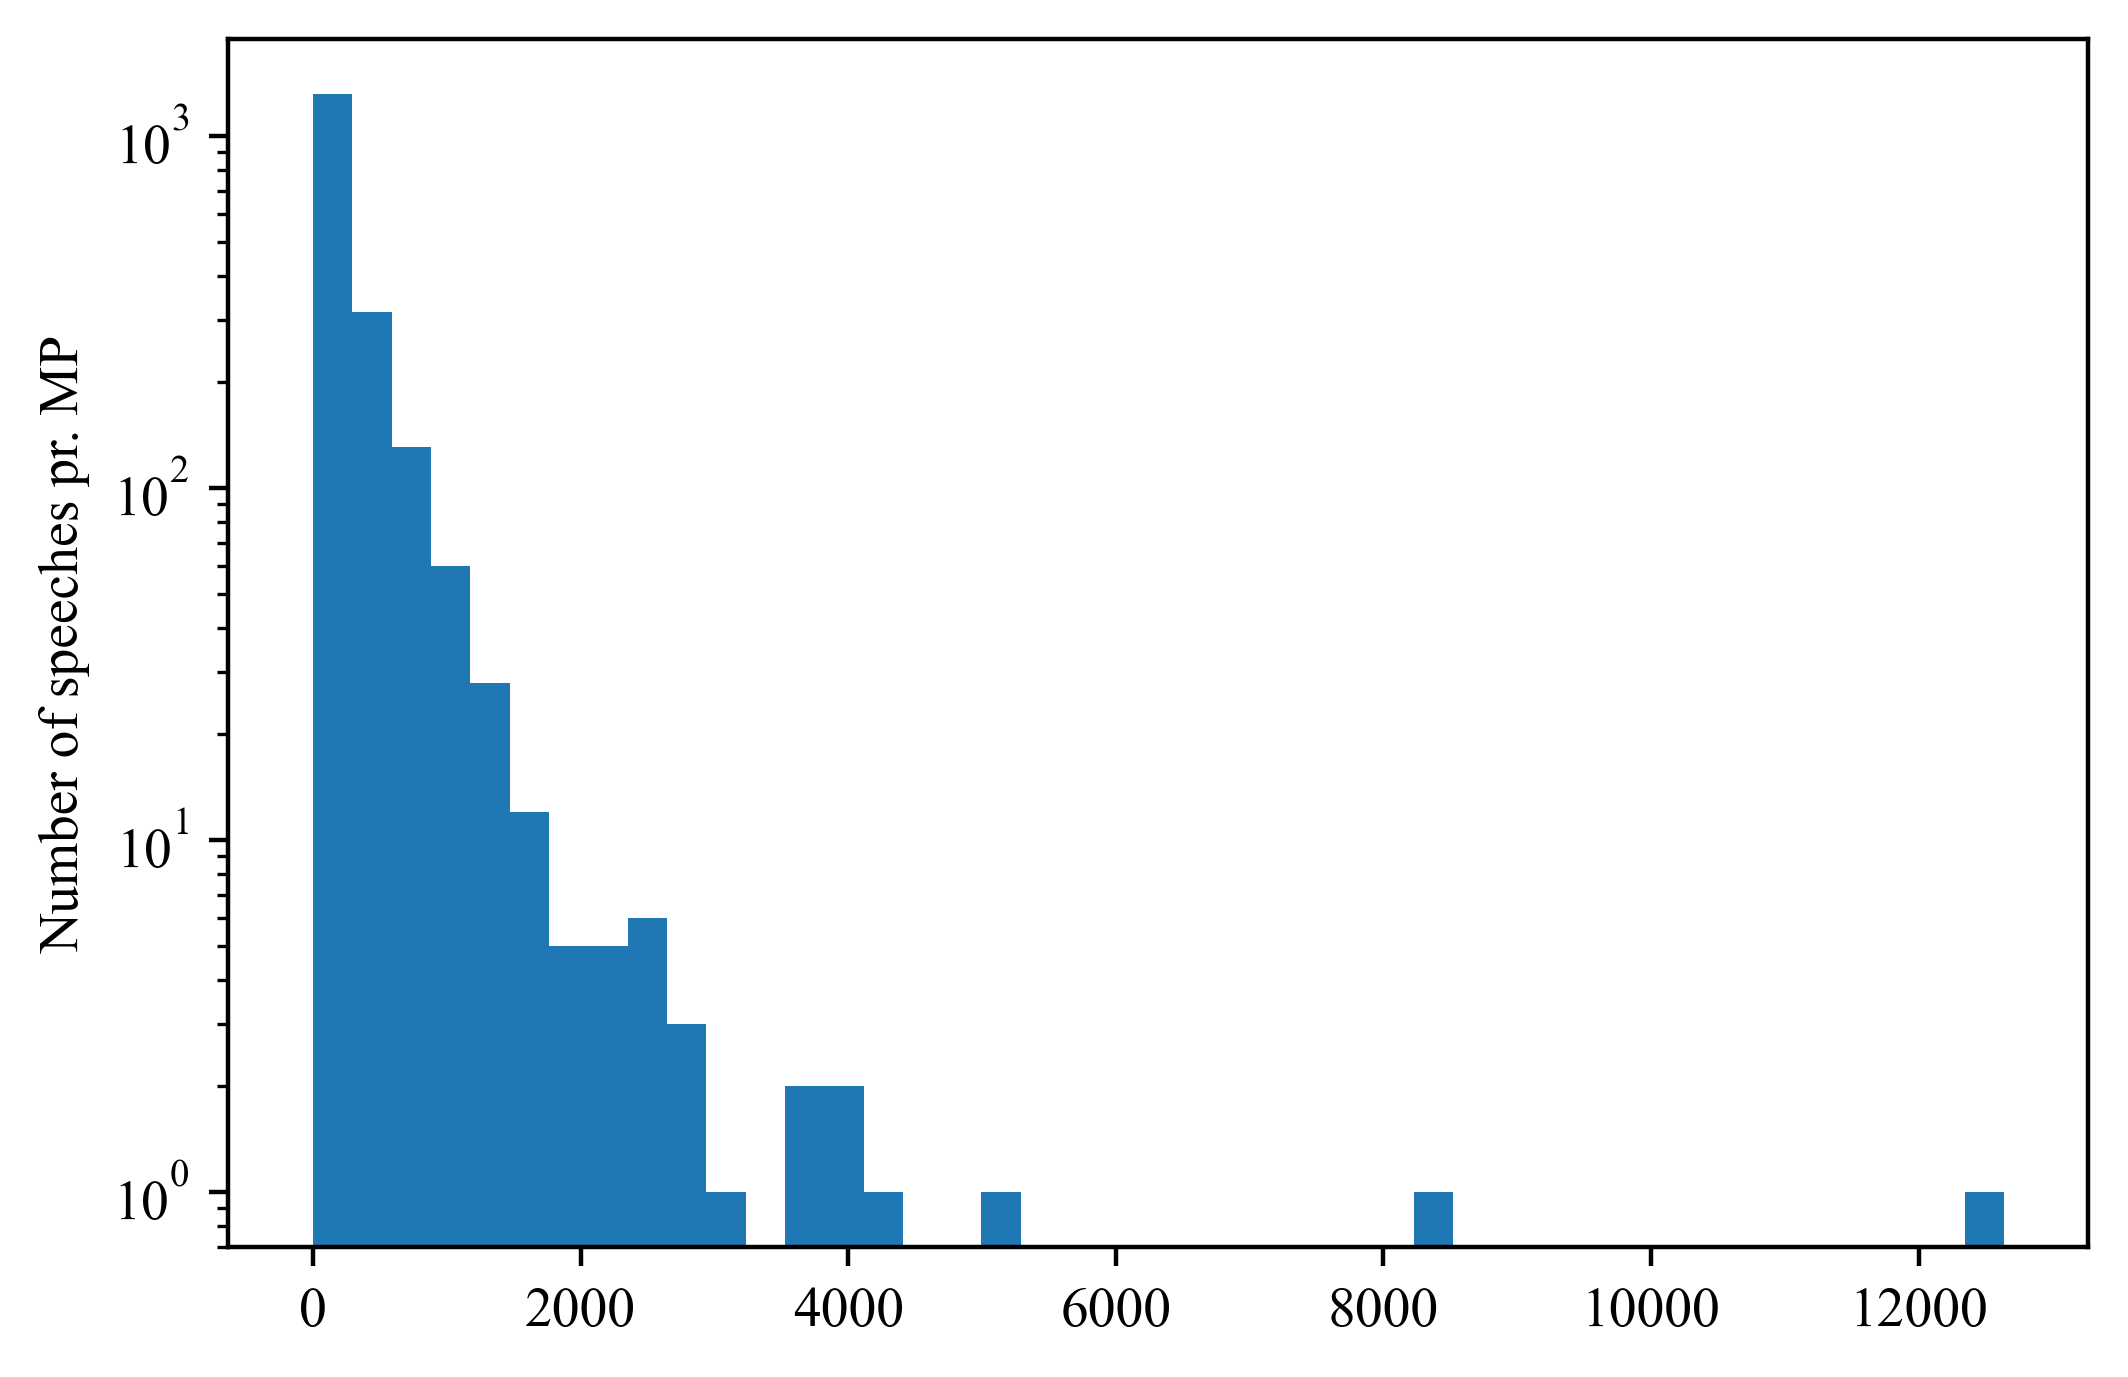

In [9]:
num_speeches = ParlaMint["Speaker_name"].value_counts()
fig, ax = plt.subplots(dpi = 400)
ax.hist(num_speeches, bins = int(np.sqrt(len(num_speeches))))
ax.set_ylabel("Number of speeches pr. MP")
ax.set_yscale("log")
fig.savefig("num_speeches.pdf")
plt.show()

From this plot it is apparent that the number of addresses each MP makes follows a power law. Prominent politicians are required to be more active in the houses as seen from the top ten speaker that consist of 2 speakers of the house, 2 prime ministers and the rest being ministers. 

Next up is a exploration of the activity in the two houses.

In [91]:
house_df = ParlaMint.groupby(by = ["From", "House"]).count()
house_df = house_df.iloc[:,0]
house_df = house_df.reset_index()
house_df = house_df.rename(columns = {"ID":"Count"})
house_df['From'] = pd.to_datetime(house_df['From'])

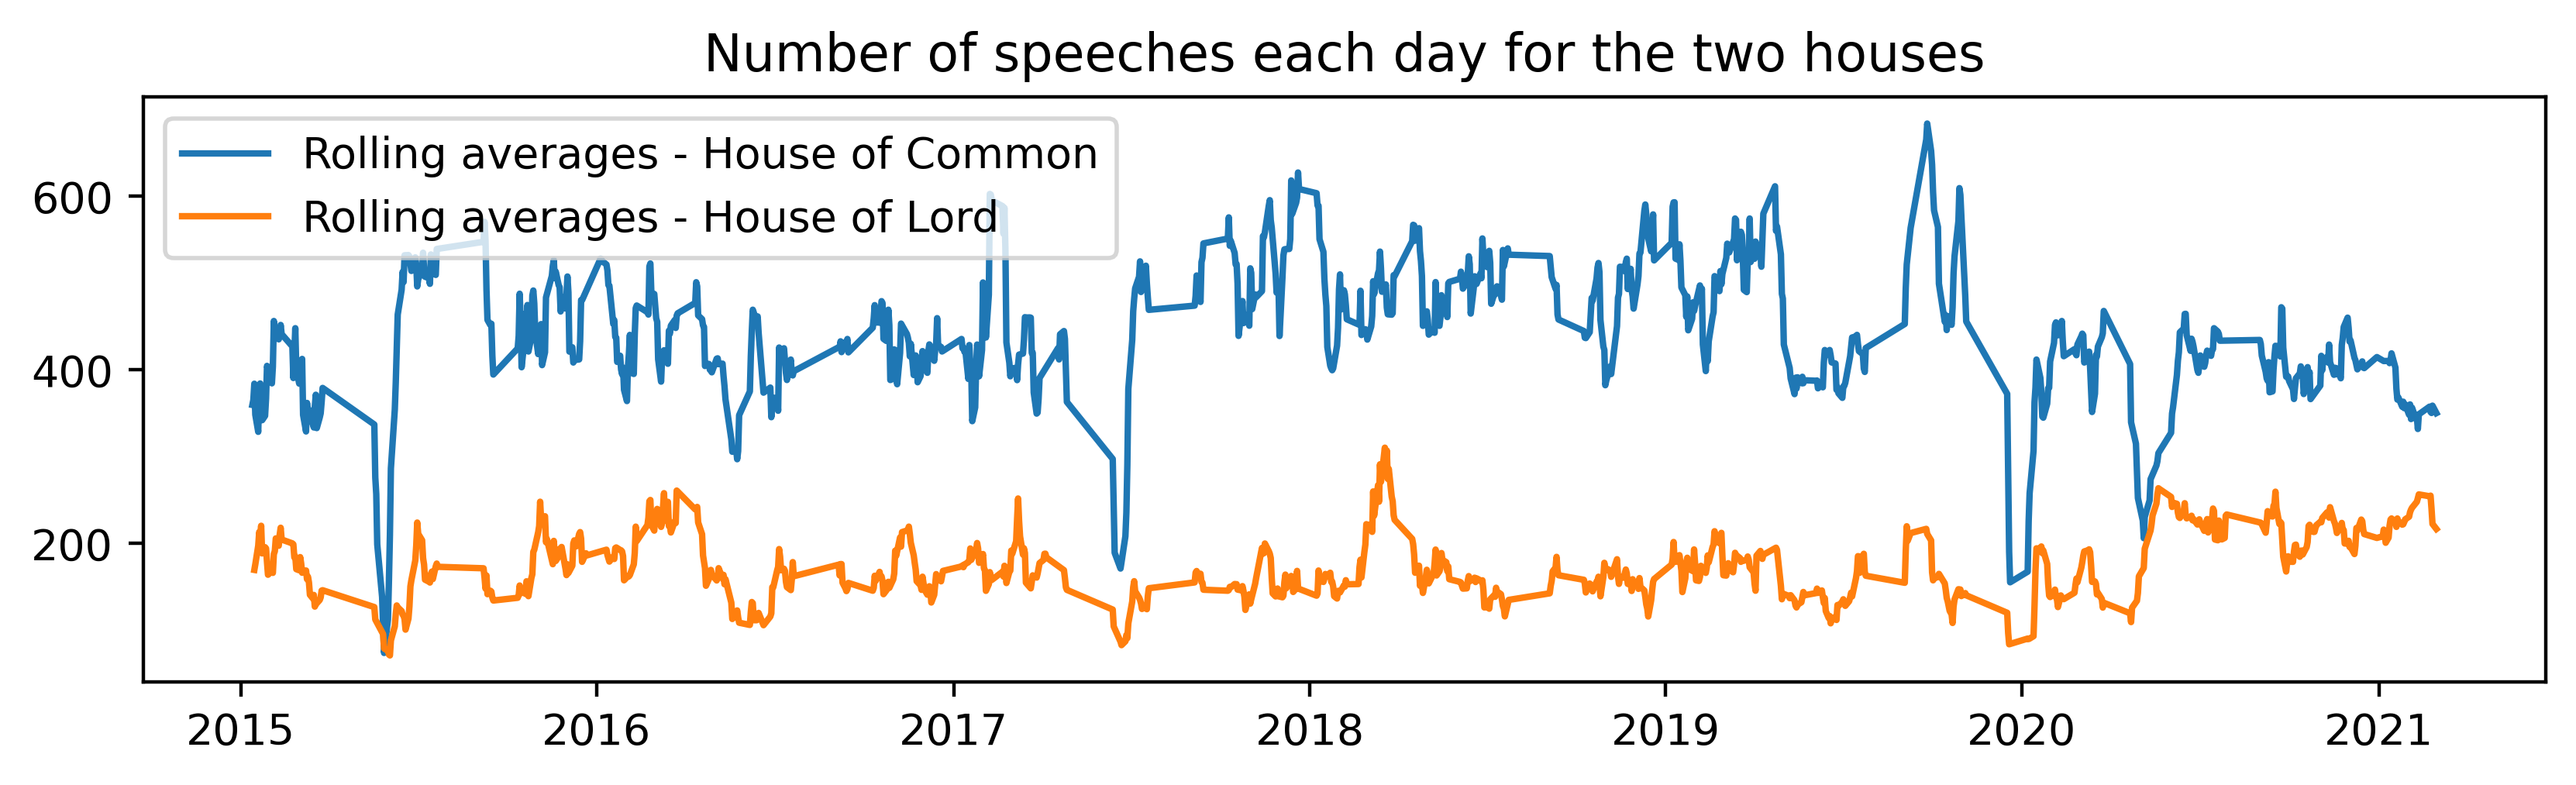

In [92]:
rolling_lower = house_df["Count"][house_df["House"] == "Lower house"].rolling(7).mean()
rolling_upper = house_df["Count"][house_df["House"] == "Upper house"].rolling(7).mean()
myFmt = mdates.DateFormatter("%b %Y")
fig, ax = plt.subplots(figsize=(10,2.5), dpi = 400)
ax.plot(house_df["From"][house_df["House"] == "Lower house"], rolling_lower, label = "Rolling averages - House of Common")
ax.plot(house_df["From"][house_df["House"] == "Upper house"], rolling_upper, label = "Rolling averages - House of Lord")
ax.set_title("Number of speeches each day for the two houses")
ax.legend()
plt.show()

There is a clear distinguishing in the activity of the two houses. A hypothesis of why is that the house of common is elected each term and the primary goal of this house is debating political topics and propose new laws. The lords are appointed and their primary goals are the shaping of laws and challenging the work of the government.  

In [93]:
gender_df = ParlaMint.groupby(by = ["From", "Speaker_gender"]).count()
gender_df = gender_df.iloc[:,0]
gender_df = gender_df.reset_index()
gender_df = gender_df.rename(columns = {"ID":"Count"})
gender_df['From'] = pd.to_datetime(gender_df['From'])

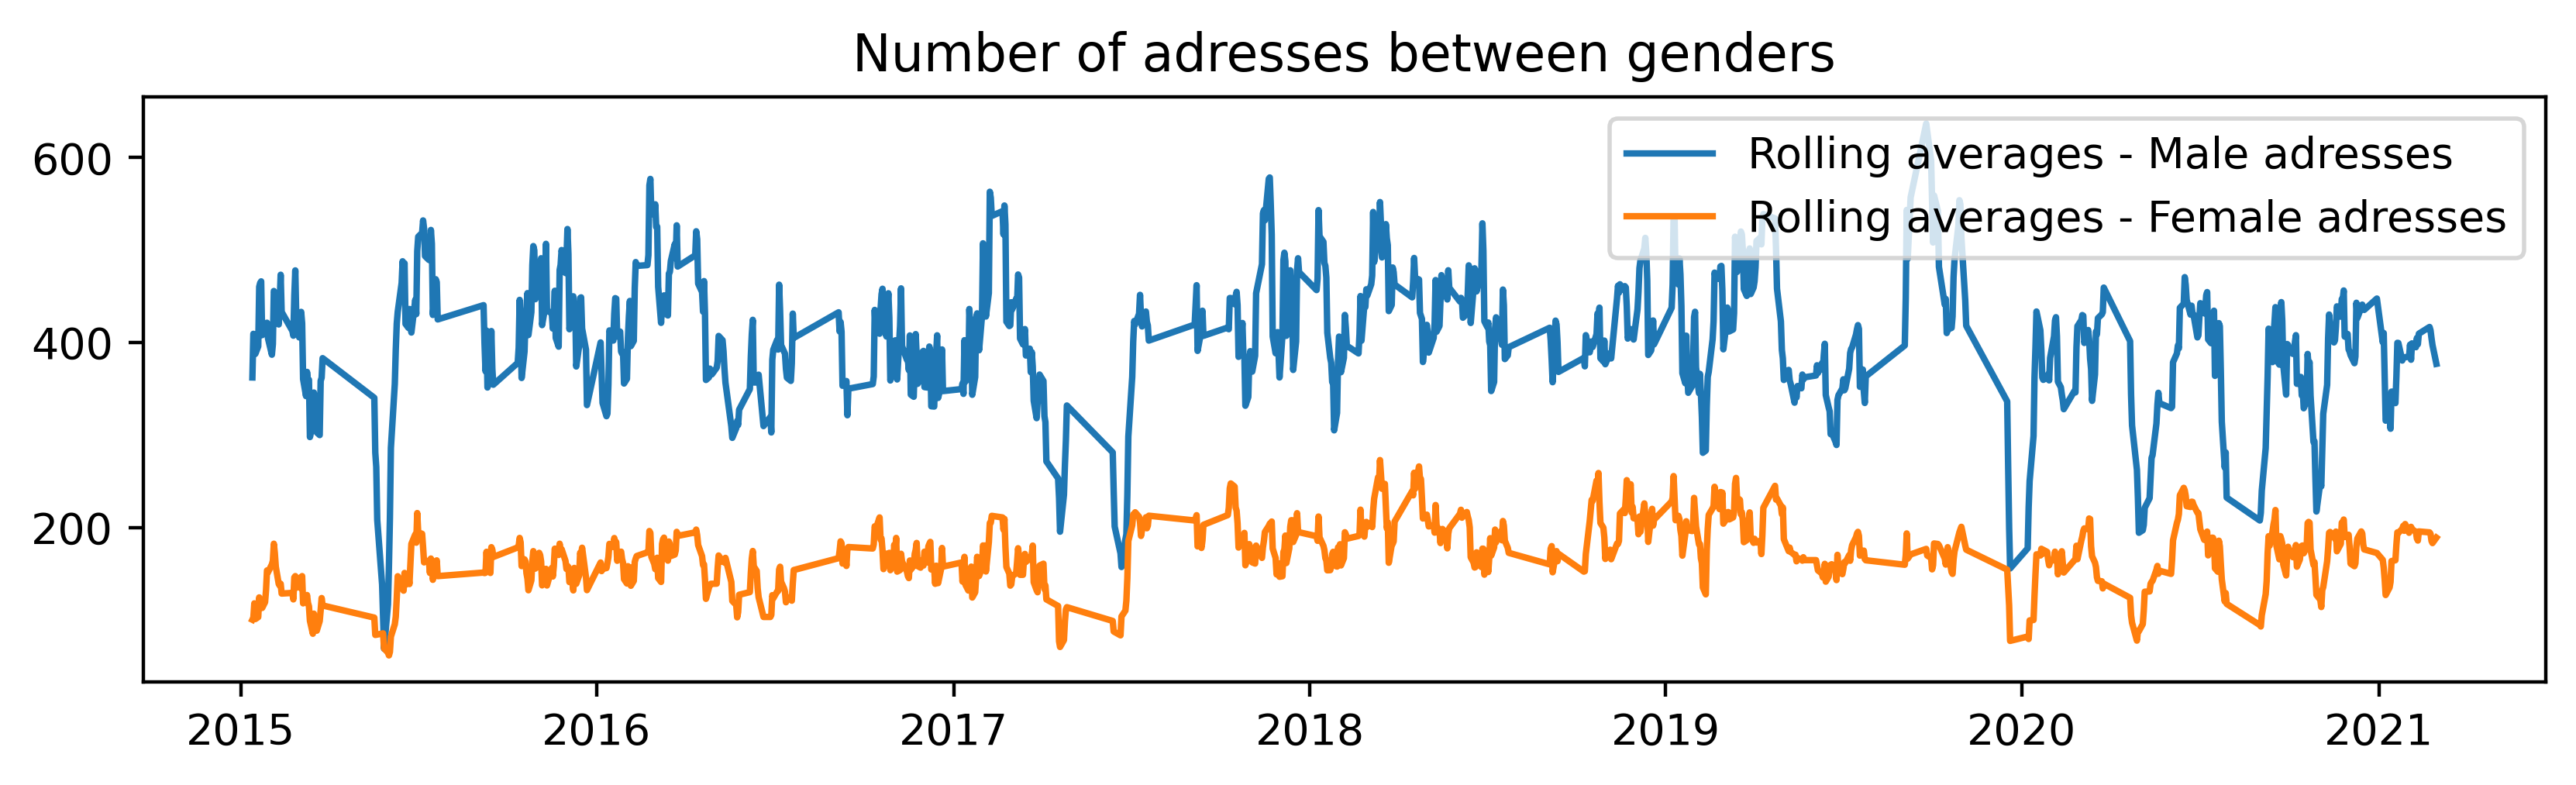

In [96]:
rolling_male = gender_df["Count"][gender_df["Speaker_gender"] == "M"].rolling(7).mean()
rolling_female = gender_df["Count"][gender_df["Speaker_gender"] == "F"].rolling(7).mean()
myFmt = mdates.DateFormatter("%b %Y")
fig, ax = plt.subplots(figsize=(10,2.5), dpi = 400)
ax.plot(gender_df["From"][gender_df["Speaker_gender"] == "M"], rolling_male, label = "Rolling averages - Male adresses")
ax.plot(gender_df["From"][gender_df["Speaker_gender"] == "F"], rolling_female, label = "Rolling averages - Female adresses")
ax.set_title("Number of adresses between genders")
ax.legend()
plt.show()

Based exclusively on the number of adresses it seems that the activities in the houses still are highly male dominated. 

### The ten characteristics of big data

After this initial analysis of the data and its structure some of the ten characteristics of big data becomes apparent. In this section some of the most relevant characteristics are explored and used to highlight important distinctive features of the dataset.

* **Dirty:** As previously shown the data contained a "dirty" feature, the "Party_status". This highlight that the dataset is susceptible to being dirty since the data originally is manually collected by the stenographer that afterwards is archived. 
* **Always-on:** Since the British government makes this data publicly available, this project could be updated with the latest debates in the houses. However,  the newer data foundation will have another data structure, so new preprocessing code will have to be delveloped to encompass this. 
* **Incomplete:** As with most datasets, the metadata can always be expanded. In this case, the relation to the topic or bill is missing. Also if the speaker is pro or against the proposed bill. 
